In [1]:
#core libraries
import pandas as pd
import numpy as np

#visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#datetime handling
from datetime import datetime

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#display setting
pd.set_option('display.max_columns',None)

In [2]:
#load only limited rows to avoid system crash
df = pd.read_csv("fraudTrain.csv", nrows = 200000)
df.shape

(200000, 23)

In [3]:
#quick data check
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             200000 non-null  int64  
 1   trans_date_trans_time  200000 non-null  object 
 2   cc_num                 200000 non-null  int64  
 3   merchant               200000 non-null  object 
 4   category               200000 non-null  object 
 5   amt                    200000 non-null  float64
 6   first                  200000 non-null  object 
 7   last                   200000 non-null  object 
 8   gender                 200000 non-null  object 
 9   street                 200000 non-null  object 
 10  city                   200000 non-null  object 
 11  state                  200000 non-null  object 
 12  zip                    200000 non-null  int64  
 13  lat                    200000 non-null  float64
 14  long                   200000 non-nu

In [5]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
#fraud distribution
df['is_fraud'].value_counts(normalize=True)*100

is_fraud
0    99.1775
1     0.8225
Name: proportion, dtype: float64

In [7]:
#convert transaction datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

#extract useful time features
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_month'] = df['trans_date_trans_time'].dt.month

In [8]:
#transaction amount summary
df['amt'].describe()

count    200000.000000
mean         71.169774
std         161.928555
min           1.000000
25%           9.660000
50%          47.660000
75%          83.580000
max       17897.240000
Name: amt, dtype: float64

In [9]:
#fraud vs non-fraud amount
df.groupby('is_fraud')['amt'].mean()

is_fraud
0     67.535820
1    509.353988
Name: amt, dtype: float64

In [10]:
# fraud by hour
fraud_by_hour = df[df['is_fraud']==1]['trans_hour'].value_counts().sort_index()
fraud_by_hour

trans_hour
0     148
1     167
2     129
3     128
4      12
5      11
6      11
7      18
8       9
9      19
10      9
11      9
12     10
13     18
14     20
15     23
16     21
17     18
18     14
19     16
20     13
21     17
22    385
23    420
Name: count, dtype: int64

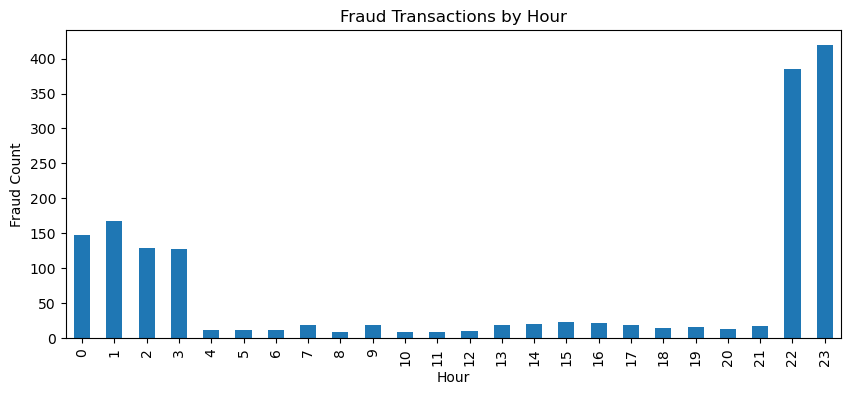

In [11]:
#visualization
plt.figure(figsize = (10,4))
fraud_by_hour.plot(kind = 'bar')
plt.title("Fraud Transactions by Hour")
plt.xlabel("Hour")
plt.ylabel("Fraud Count")
plt.show()

In [12]:
#gender and fraud risk
df.groupby('gender')['is_fraud'].mean() * 100

gender
F    0.833105
M    0.809676
Name: is_fraud, dtype: float64

In [13]:
#Merchant Risk Analysis
merchant_risk = (
    df.groupby('merchant')['is_fraud'].mean()
    .sort_values(ascending=False).head(10)
)

In [14]:
#Category Level Fraud
category_risk = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
category_risk

category
shopping_net      0.023233
grocery_pos       0.020377
misc_net          0.019288
shopping_pos      0.009693
gas_transport     0.007354
travel            0.004966
misc_pos          0.004681
grocery_net       0.004297
kids_pets         0.003714
personal_care     0.003671
entertainment     0.003330
health_fitness    0.002687
food_dining       0.002340
home              0.001955
Name: is_fraud, dtype: float64

In [15]:
#Location risk
state_risk = df.groupby('state')['is_fraud'].mean().sort_values(ascending=False)
state_risk.head(10)

state
AK    0.078717
TN    0.022501
DC    0.016181
NY    0.014276
ME    0.013503
MN    0.013091
NE    0.012523
WY    0.010989
ND    0.010941
IA    0.010649
Name: is_fraud, dtype: float64

In [16]:
#Customer risk scoring
customer_risk = (
    df.groupby('cc_num')['is_fraud'].mean().reset_index()
)

customer_risk.columns = ['cc_num', 'fraud_risk_score']
customer_risk.head

<bound method NDFrame.head of                   cc_num  fraud_risk_score
0            60416207185          0.037500
1            60422928733          0.000000
2            60423098130          0.113636
3            60427851591          0.000000
4            60487002085          0.000000
..                   ...               ...
926  4958589671582726883          0.000000
927  4973530368125489546          0.000000
928  4980323467523543940          0.000000
929  4989847570577635369          0.000000
930  4992346398065154184          0.000000

[931 rows x 2 columns]>

In [17]:
#estimated fraud loss
fraud_loss = df[df['is_fraud'] == 1]['amt'].sum()
fraud_loss

np.float64(837887.31)

In [18]:
merchant_risk.to_csv("CreditCardFraud.csv", index=False)
customer_risk.to_csv("CreditCardFraud.csv", index=False)

In [23]:
merchant_risk_df = merchant_risk.reset_index()
merchant_risk_df.columns = ['merchant_id', 'fraud_rate']

merchant_risk_df.sort_values('fraud_rate', ascending=False).head(10)


,merchant_id,fraud_rate
0,fraud_Kiehn-Emmerich,0.044444
1,"fraud_Herman, Treutel and Dickens",0.043062
2,"fraud_Kerluke, Kertzmann and Wiza",0.040816
3,fraud_Heathcote LLC,0.039474
4,fraud_Kozey-Boehm,0.038710
5,"fraud_Baumbach, Feeney and Morar",0.037671
6,fraud_Gleason-Macejkovic,0.036424
7,"fraud_Moore, Dibbert and Koepp",0.035897
8,"fraud_Labadie, Treutel and Bode",0.034375
9,fraud_Fisher Inc,0.033003
